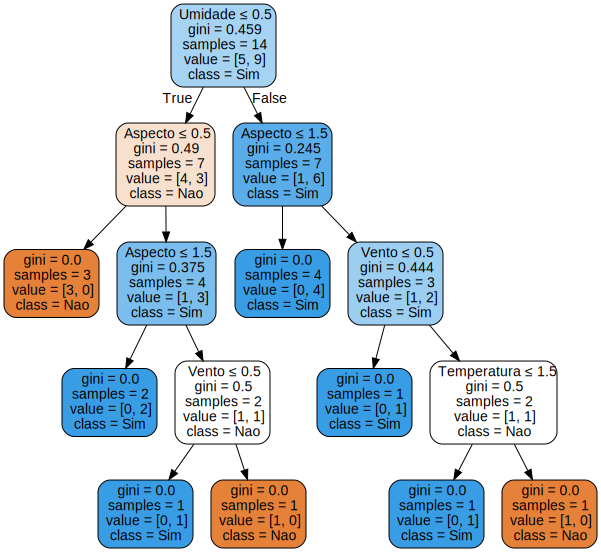

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# Dados em formato de dicionário
data = {
    'Dia': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Aspecto': ['Sol', 'Sol', 'Nuvens', 'Chuva', 'Chuva', 'Chuva', 'Nuvens', 'Sol', 'Sol', 'Chuva', 'Sol', 'Nuvens', 'Nuvens', 'Chuva'],
    'Temperatura': ['Quente', 'Quente', 'Quente', 'Ameno', 'Fresco', 'Fresco', 'Fresco', 'Ameno', 'Fresco', 'Ameno', 'Ameno', 'Ameno', 'Quente', 'Ameno'],
    'Umidade': ['Elevada', 'Elevada', 'Elevada', 'Elevada', 'Normal', 'Normal', 'Normal', 'Elevada', 'Normal', 'Normal', 'Normal', 'Elevada', 'Normal', 'Elevada'],
    'Vento': ['Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Forte', 'Forte', 'Fraco', 'Forte'],
    'Jogar': ['Nao', 'Nao', 'Sim', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Nao']
}

# Convertendo dados em DataFrame
df = pd.DataFrame(data)

# Convertendo atributos categóricos em numéricos
df['Aspecto'] = df['Aspecto'].map({'Sol': 0, 'Nuvens': 1, 'Chuva': 2})
df['Temperatura'] = df['Temperatura'].map({'Quente': 0, 'Ameno': 1, 'Fresco': 2})
df['Umidade'] = df['Umidade'].map({'Elevada': 0, 'Normal': 1})
df['Vento'] = df['Vento'].map({'Fraco': 0, 'Forte': 1})
df['Jogar'] = df['Jogar'].map({'Nao': 0, 'Sim': 1})

# Definindo features (X) e target (y)
X = df[['Aspecto', 'Temperatura', 'Umidade', 'Vento']]
y = df['Jogar']

# Criando o modelo de Árvore de Decisão
model = DecisionTreeClassifier()
model.fit(X, y)

# Exportando a árvore de decisão para o formato DOT
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=['Aspecto', 'Temperatura', 'Umidade', 'Vento'],
    class_names=['Nao', 'Sim'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Gerando a imagem da árvore de decisão
graph = graphviz.Source(dot_data)
graph.render("arvore_decisao_final")  # Isto salva a árvore em um arquivo 'arvore_decisao.pdf'

# Para exibir a árvore diretamente no Jupyter Notebook (se aplicável)
graph
